In [1]:
%pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -qU "langchain[google-genai]" --use-deprecated=legacy-resolver

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -qU langchain-google-genai

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install -qU langchain-chroma --use-deprecated=legacy-resolver

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [6]:
#force downgrade urllib due to errors with modernized version
%pip install urllib3==1.26.18

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install -qU langchain_community pymupdf

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install -qU pytesseract

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install -U langgraph

In [72]:
import getpass
import os
from dotenv import load_dotenv
load_dotenv()

#Here we just load in all the API keys and choose what AI model we want to run. 
#We setup the vector store and embeddings to later store our indices into to retrieve later.

os.environ["LANGSMITH_TRACING"] = "true"
if not os.environ.get("LANGSMITH_API_KEY"):
    os.environ["LANGSMITH_API_KEY"] = getpass.getpass("Enter Langsmith API Key")

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain.chat_models import init_chat_model
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_chroma import Chroma

llm = init_chat_model("gemini-2.0-flash", model_provider="google_genai")

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

print("YAY")

YAY


In [86]:
from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    return

In [73]:
#Load papers 
from langchain_community.document_loaders import PyMuPDFLoader

file_path = "dnutg/paper1.pdf"
loader = PyMuPDFLoader(file_path, mode="page", 
                        extract_tables="markdown",
                      )
docs = loader.load()

In [74]:
print(docs[2])

page_content='JAW 
Vol. 2x. No. h 
T?XlJl 
Et- Al.. 
Ncwmhcr 
IS. IWh:ISW-Jh 
1541 
DEl‘ERMINANlS 
OF HEART 
RAIlI 
VARlAHIl.IT1 
Table 1. Pratwn Correlations .1mong Measures of Heart Rate \‘ariahi!ity’ 
- 
In 
In 
In 
In 
In 
LF, HF 
In 2-h 
In 
In 
VLF+ 
LF 
HF 
TPt 
R&l 
SDNN 
pSNW 
r-MSSD 
Mean 
7.37 
h.U 
5.3 I 
7.3' I- 
I.12 
4.41 
I .50 
3. !fl 
SD 
In VLFt 
in LF 
In HF 
In TPt 
In LFlHF ruin 
In l-h SDNN 
In pNNS0 
0.7.l 
0.00 
(I.‘:3 
o.xl 
l1.51 
0.31 
IX 
I I.41 
0.M 
0.7ll 
I l.(ti 
II.:? 
Il.dU 
N’ll 
Il.hs 
IuiJ 
NYC 
ll.I!* 
ON 
(I.73 
0.71 
11.55 
- II.32 
0.7.5 
O.Vl 
11.43 
Il.11 
il.SY 
11.7' 
(I.iS 
(l.U7 
-0.3 
-- NJI 
11.70 
MY 
11.93 
Statistical 
methods. 
Measures of heart rate variability 
were natural log transformed because their distributions were 
highly skewed. Associations among transformed variables were 
assessed with Pearson’s correlation coefficients. In preliminary 
analyses, mean values of heart rate variability measures were 
plotted against age 

In [75]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, #chunk size
    chunk_overlap=200, #chunk overlap
    add_start_index=True, #track index
)
all_splits = text_splitter.split_documents(docs)
print(f"Split dem cheeks boi (into a diclosed number of subdocs): {len(all_splits)} sub-documents.")

Split dem cheeks boi (into a diclosed number of subdocs): 48 sub-documents.


In [76]:
document_ids = vector_store.add_documents(documents=all_splits)
print(document_ids[:3])

['9de79cf1-3afb-49a9-86d8-1670d941ed51', '87274021-4a45-492a-815e-5fed67089d31', 'a8ced440-d225-4ee1-aff5-311f1462c623']


In [77]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = """You are a highly knowledgeable AI assistant specializing in cardiovascular health and medical research.
Your primary goal is to provide accurate, evidence-based answers to user questions about heart rate, heart health, and related medical conditions.

Answer the question ONLY based on the following context. If the answer cannot be found in the context, please respond to the best of your given ability with the context. You don't have to answer the question if you cannot, but try to give as much context to answering the question as possible. Do not make up information.

Context:
{context}

Question:
{question}
"""

prompt = ChatPromptTemplate.from_template(prompt_template)

sample_context = """
A study on resting heart rate found that a rate between 60-100 is normal.
"""

sample_question = "What is a good heart rate?"

prompt_value = prompt.invoke({"context":sample_context, "question":sample_question})

example_messages = prompt_value.to_messages()
assert len(example_messages) == 1
print(example_messages[0].content)


You are a highly knowledgeable AI assistant specializing in cardiovascular health and medical research.
Your primary goal is to provide accurate, evidence-based answers to user questions about heart rate, heart health, and related medical conditions.

Answer the question ONLY based on the following context. If the answer cannot be found in the context, please respond to the best of your given ability with the context. You don't have to answer the question if you cannot, but try to give as much context to answering the question as possible. Do not make up information.

Context:

A study on resting heart rate found that a rate between 60-100 is normal.


Question:
What is a good heart rate?



In [78]:
#We use langGraph to tie together retrievel and generation into simpler process
#Makes it easier to update later + easy to trace steps of the application
from langchain_core.documents import Document
from typing_extensions import List, TypedDict
from langgraph.graph import START, StateGraph

class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}

def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

#now make graph object that compiles all components into one
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

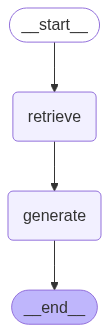

In [79]:
#workflow display
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [91]:
#test app
result = graph.invoke({"question": "What type of people have heart rate variability? Where is it most commonly seen?"})
#print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Answer: Based on the context, heart rate variability (HRV) measures were studied in subjects with conditions such as cerebrovascular disease, congestive heart failure, and diabetes, and who were not receiving cardioactive medications. The data regarding heart rate variability was obtained while subjects underwent an extensive clinic evaluation and are not representative of basal rest conditions.


In [88]:
%%skip
#testing the app using diff method. This one is streaming
for step in graph.stream(
    {"question": "What is a heart?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")

In [87]:
%%skip
#Uses stream tokens?? idk 
for message, metadata in graph.stream(
    {"question": "What is a heart rate variability?"}, stream_mode="messages"
):
    print(message.content, end="|")